In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import numpy as np

In [2]:
X,Y=make_classification(n_samples=400,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=3)

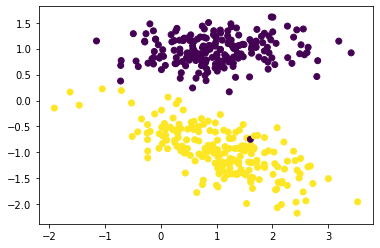

In [3]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
Y[Y==0]=-1

In [5]:
class SVM:
    
    def __init__(self,c=1.0):
        self.c=c
        self.w=0
        self.b=0
        
    def hinge_loss(self,W,b,X,Y):
        loss=0.0
        loss+=0.5*np.dot(W,W.T)
        for i in range(X.shape[0]):
            ti=Y[i]*(np.dot(W,X[i])+b)
            loss+=self.c*max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,max_iter=100):
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        n=learning_rate
        c=self.c
        
        W=np.zeros((1,no_of_features))
        bias=0
        
        losses=[]
        
        for i in range(max_iter):
            l=self.hinge_loss(W,bias,X,Y)
            losses.append(l)
            ids=np.arange(no_of_samples)
            for batch_start in range(0,no_of_samples,batch_size):
                
                gradw=0
                gradb=0
                
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i=ids[j]
                        ti=Y[i]*(np.dot(W,X[i].T)+bias)
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb+=c*Y[i]
                            
                W=W-(n*W)+(n*gradw)
                bias=bias+n*gradb
                
        return losses,W,bias

In [6]:
mySVM=SVM()

In [7]:
losses,W,bias=mySVM.fit(X,Y)

In [8]:
print(losses)

[400.0, 250.83331484988156, 119.76782098239796, 68.74093123632458, 51.73341857834543, 43.87851934284388, 38.9702076060225, 35.39884876878357, 32.62513869524123, 30.44361881841455, 28.598032614188625, 27.052607852688645, 25.788662071704955, 24.660611240024686, 23.691204042985667, 22.895536804854494, 22.19389367893647, 21.712871337470386, 21.284167829196612, 20.90099171112298, 20.539775167891296, 20.25137067557367, 19.9991160630895, 19.768972628142507, 19.552536328185976, 19.33692007457448, 19.12211960870992, 18.908130696842214, 18.712988318774308, 18.550178441896048, 18.391830768113813, 18.24309071601563, 18.114362512280035, 17.993747173045872, 17.870260641676584, 17.750104671255293, 17.628216317891297, 17.508458025843144, 17.388208707906468, 17.296388991239763, 17.20813955637051, 17.120253070874607, 17.04064991353078, 16.97452321307845, 16.908910010333948, 16.844986100393555, 16.785347651006635, 16.725935518703245, 16.666748607709277, 16.60778582815666, 16.549046096047643, 16.490528333

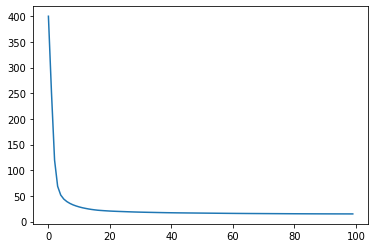

In [9]:
plt.plot(losses)
plt.show()

In [10]:
print(W)
print(bias)

[[-0.32411857 -2.03394887]]
0.3870000000000003


In [11]:
#w1x1+w2x2+b=0
# x2=-(W1X1+b)/W2
x1=np.linspace(-2,3.2,50)
x2=-(W[0][0]*x1+bias)/W[0][1]

In [12]:
x_p=(-(W[0][0]*x1+bias-1))/W[0][1]
x_n=-(W[0][0]*x1+bias+1)/W[0][1]

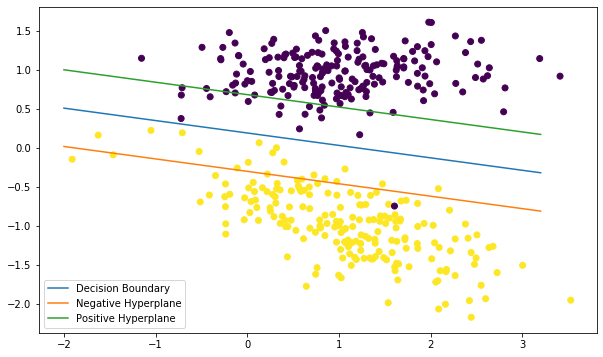

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x1,x2,label='Decision Boundary')
plt.plot(x1,x_p,label='Negative Hyperplane')
plt.plot(x1,x_n,label='Positive Hyperplane')
plt.legend()
plt.show()

In [14]:
newSVM=SVM(c=10000)

In [15]:
losses,W,bias=mySVM.fit(X,Y)

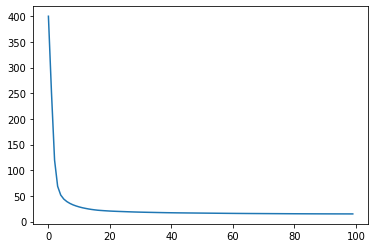

In [16]:
plt.plot(losses)
plt.show()

In [17]:
print(W)
print(bias)

[[-0.32411857 -2.03394887]]
0.3870000000000003


In [18]:
 #w1x1+w2x2+b=0
# x2=-(W1X1+b)/W2
x1=np.linspace(-2,3.2,50)
x2=-(W[0][0]*x1+bias)/W[0][1]

In [19]:
x_p=(-(W[0][0]*x1+bias)+1)/W[0][1]
x_n=-(W[0][0]*x1+bias+1)/W[0][1]

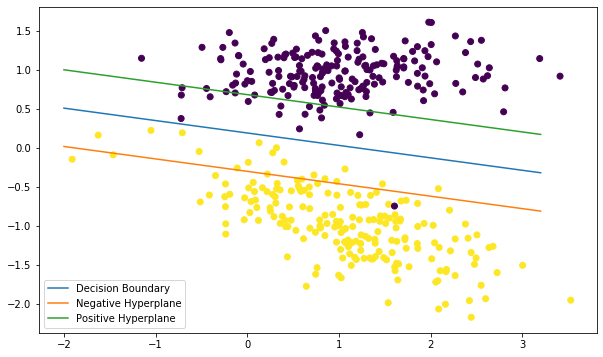

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x1,x2,label='Decision Boundary')
plt.plot(x1,x_p,label='Negative Hyperplane')
plt.plot(x1,x_n,label='Positive Hyperplane')
plt.legend()
plt.show()